In [2]:
import numpy as np
import pandas as pd
import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random

In [23]:
data_cluster = pd.read_csv('data_regression.csv', dtype={"CLNT_ID":np.str},thousands=",")
data_cluster.head()

,CLNT_ID,ACTIVE_DAYS,N_SESS,N_PRODUCT,N_LOGIN,PURCHASE_CYCLE,HITS_SEQ,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,...,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,CLNT_GENDER,CLNT_AGE
0,0000008,118,2,1,2,59.0,57.000000,4.5,46.500000,417.000000,...,0,0,0,0,0,0,2,0,M,20
1,0000014,20,1,2,1,20.0,284.000000,5.0,256.000000,7098.000000,...,0,0,0,0,0,0,2,0,F,30
2,0000032,20,2,4,2,10.0,58.000000,101.4,98.200000,2169.000000,...,0,0,0,0,0,0,5,0,M,40
3,0000056,97,2,2,2,48.5,47.333333,82.0,45.666667,1157.666667,...,0,0,0,0,1,0,0,2,F,40
4,0000058,74,1,5,1,74.0,209.000000,8.0,195.000000,3161.000000,...,0,1,0,0,0,0,5,0,F,30


In [3]:
data_cluster.columns

Index(['CLNT_ID', 'ACTIVE_DAYS', 'N_SESS', 'N_PRODUCT', 'N_LOGIN',
       'PURCHASE_CYCLE', 'HITS_SEQ', 'SESS_SEQ', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'PD_BUY_AM', 'TOTAL_BUY_AM_x', 'TOTAL_BUY_AM_y',
       'TOTAL_CT', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend', 'CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3',
       'CLAC0_4', 'CLAC0_5', 'CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9',
       'CLNT_GENDER', 'CLNT_AGE'],
      dtype='object')

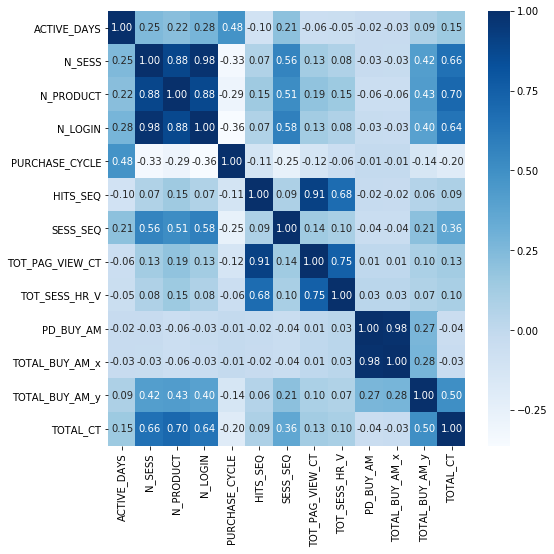

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
# annot : anooation 각 셀의 값을 표시할지 결정
# fmt : annot가 true일 경우에 숫자 표시를 어떻게 할지
sns.heatmap(data=data_cluster[data_cluster.columns[1:14]].corr(),cmap='Blues',annot=True,fmt='.2f')

In [88]:
data_cluster = data_cluster.drop(['PD_BUY_AM','HITS_SEQ','N_SESS','N_SESS','N_PRODUCT'], axis=1)

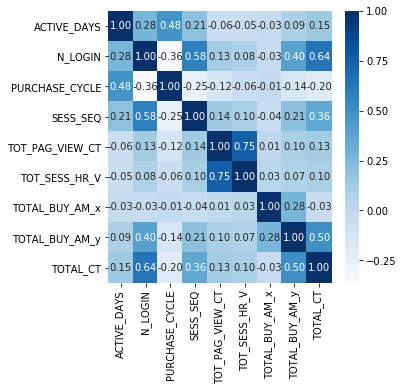

In [89]:
plt.figure(figsize=(5,5))
sns.heatmap(data=data_cluster[data_cluster.columns[1:10]].corr(),cmap='Blues',annot=True,fmt='.2f')

### 50대 남자 Cluster

In [24]:
data_cluster = pd.read_csv('data_clustering.csv', dtype={"CLNT_ID":np.str},thousands=",")
data_cluster.head()

,CLNT_ID,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,...,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,CLNT_GENDER,CLNT_AGE
0,8,118,2,59.0,4.5,46.500000,417.000000,38000.000000,76000,2,...,0,0,0,0,0,0,2,0,M,20
1,14,20,1,20.0,5.0,256.000000,7098.000000,34900.000000,69800,2,...,0,0,0,0,0,0,2,0,F,30
2,32,20,2,10.0,101.4,98.200000,2169.000000,15360.000000,76800,5,...,0,0,0,0,0,0,5,0,M,40
3,56,97,2,48.5,82.0,45.666667,1157.666667,7933.333333,23800,3,...,0,0,0,0,1,0,0,2,F,40
4,58,74,1,74.0,8.0,195.000000,3161.000000,21850.000000,131100,6,...,0,1,0,0,0,0,5,0,F,30


In [25]:
cluster = data_cluster.loc[(data_cluster['CLNT_GENDER'] == 'M') & (data_cluster['CLNT_AGE'] == 50)]
del data_cluster
cluster = cluster.drop(['CLNT_ID','CLNT_GENDER','CLNT_AGE'], axis=1)
print(cluster.shape)
cluster.head()

(7741, 53)


,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
119,25,4,6.250000,51.500000,151.800000,1487.700000,21600.000000,216000,11,0.0,...,0,1,0,0,0,0,0,3,5,2
155,24,3,8.000000,68.600000,68.400000,618.000000,23520.000000,117600,7,0.0,...,0,0,3,0,3,0,0,0,1,0
161,29,2,14.500000,142.000000,123.000000,1306.500000,282500.000000,565000,2,0.0,...,0,0,0,0,0,0,0,0,1,1
245,23,3,7.666667,97.333333,88.666667,1304.333333,117200.000000,351600,3,0.0,...,0,0,0,3,0,0,0,0,0,0
276,170,2,85.000000,11.333333,65.666667,958.333333,149933.333333,449800,3,0.0,...,0,0,0,1,2,0,0,0,0,0


In [26]:
CLAC0_data = cluster.loc[:, cluster.columns.str.startswith('CLNT') | cluster.columns.str.startswith('CLAC0') ]
CLAC0_data.head()

,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
119,0,1,0,0,0,0,0,3,5,2
155,0,0,3,0,3,0,0,0,1,0
161,0,0,0,0,0,0,0,0,1,1
245,0,0,0,3,0,0,0,0,0,0
276,0,0,0,1,2,0,0,0,0,0


In [27]:
CLAC0_data.to_csv('CLAC0_data_M50.csv',index=False)

In [31]:
cluster.columns

Index(['ACTIVE_DAYS', 'N_SESS', 'N_PRODUCT', 'N_LOGIN', 'PURCHASE_CYCLE',
       'HITS_SEQ', 'SESS_SEQ', 'TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V', 'PD_BUY_AM',
       'TOTAL_BUY_AM_x', 'TOTAL_BUY_AM_y', 'TOTAL_CT', 'DVC_desktop',
       'DVC_mobile', 'DVC_tablet', 'ZON_Busan', 'ZON_Chungcheongbuk-do',
       'ZON_Chungcheongnam-do', 'ZON_Daegu', 'ZON_Daejeon', 'ZON_Gangwon-do',
       'ZON_Gwangju', 'ZON_Gyeonggi-do', 'ZON_Gyeongsangbuk-do',
       'ZON_Gyeongsangnam-do', 'ZON_Incheon', 'ZON_Jeju-do',
       'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul', 'ZON_Ulsan',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend', 'CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3',
       'CLAC0_4', 'CLAC0_5', 'CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9',
       'predict'],
      dtype='object')

In [12]:
#대대분류 삭제
cluster_drop = cluster.drop(cluster.loc[:, cluster.columns.str.startswith('CLAC0')], axis = 1)
print(cluster_drop.shape)
cluster_drop.head() 

(7741, 43)


,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,month_9,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,weekend_weekday,weekend_weekend
119,25,4,6.250000,51.500000,151.800000,1487.700000,21600.000000,216000,11,0.0,...,1.0,0.000000,0.0,0.000000,0.100000,0.1,0.800000,0.0,0.500000,0.500000
155,24,3,8.000000,68.600000,68.400000,618.000000,23520.000000,117600,7,0.0,...,1.0,0.200000,0.6,0.000000,0.000000,0.0,0.000000,0.2,0.200000,0.800000
161,29,2,14.500000,142.000000,123.000000,1306.500000,282500.000000,565000,2,0.0,...,1.0,0.500000,0.0,0.000000,0.500000,0.0,0.000000,0.0,0.500000,0.500000
245,23,3,7.666667,97.333333,88.666667,1304.333333,117200.000000,351600,3,0.0,...,1.0,0.333333,0.0,0.333333,0.333333,0.0,0.000000,0.0,0.333333,0.666667
276,170,2,85.000000,11.333333,65.666667,958.333333,149933.333333,449800,3,0.0,...,0.0,0.000000,0.0,0.333333,0.000000,0.0,0.666667,0.0,0.666667,0.333333


In [13]:
mms = MinMaxScaler()
mms.fit(cluster_drop) #대대분류 뺀 column들만 갖고
cluster_transformed = mms.transform(cluster_drop)

### Choosing the Number of Clusters : Elbow Method

In [14]:
SSD = []

for k in range(1,10):
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_transformed)
    SSD.append(km.inertia_)

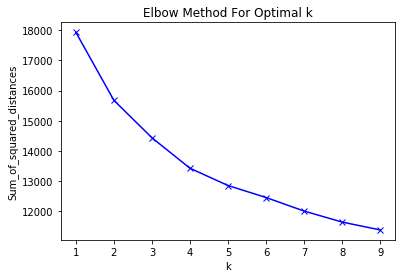

In [15]:
plt.plot(range(1,10), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
k=3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_transformed) # 데이터를 이용하여 클러스터링을 위한 학습 시작하고 중심점 추출

cluster_transformed = pd.DataFrame(cluster_transformed)
cluster_transformed.columns = cluster_drop.columns
cluster_transformed.index = cluster_drop.index
cluster_transformed['predict'] = km.predict(cluster_transformed)
cluster_transformed.head()

,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,weekend_weekday,weekend_weekend,predict
119,0.131868,0.030303,0.028846,0.020957,0.301408,0.117623,0.006684,0.000770,0.011655,0.0,...,0.000000,0.0,0.000000,0.100000,0.1,0.800000,0.0,0.500000,0.500000,1
155,0.126374,0.020202,0.038462,0.028054,0.133602,0.047924,0.007308,0.000417,0.006993,0.0,...,0.200000,0.6,0.000000,0.000000,0.0,0.000000,0.2,0.200000,0.800000,2
161,0.153846,0.010101,0.074176,0.058514,0.243461,0.103101,0.091449,0.002020,0.001166,0.0,...,0.500000,0.0,0.000000,0.500000,0.0,0.000000,0.0,0.500000,0.500000,0
245,0.120879,0.020202,0.036630,0.039978,0.174380,0.102928,0.037744,0.001255,0.002331,0.0,...,0.333333,0.0,0.333333,0.333333,0.0,0.000000,0.0,0.333333,0.666667,2
276,0.928571,0.010101,0.461538,0.004288,0.128102,0.075199,0.048379,0.001607,0.002331,0.0,...,0.000000,0.0,0.333333,0.000000,0.0,0.666667,0.0,0.666667,0.333333,1


In [17]:
cluster_transformed['predict'].value_counts()

1    3231
0    2326
2    2184
Name: predict, dtype: int64

In [18]:
# predict clustering 0
idx = np.where(cluster_transformed['predict'] == 0)
cluster_0 = cluster.loc[cluster.index[idx]]

# predict clustering 1
idx = np.where(cluster_transformed['predict'] == 1)
cluster_1 = cluster.loc[cluster.index[idx]]

# predict clustering 2
idx = np.where(cluster_transformed['predict'] == 2)
cluster_2 = cluster.loc[cluster.index[idx]]

In [19]:
pd.DataFrame({"cluster0":round(cluster_0.mean(),2),"cluster1":round(cluster_1.mean(),2),"cluster2":round(cluster_2.mean(),2)})

,cluster0,cluster1,cluster2
ACTIVE_DAYS,115.65,117.95,92.05
N_LOGIN,3.46,3.88,2.23
PURCHASE_CYCLE,56.51,56.10,58.56
SESS_SEQ,100.76,112.13,71.55
TOT_PAG_VIEW_CT,80.47,82.45,92.27
TOT_SESS_HR_V,1415.96,1436.72,1608.54
TOTAL_BUY_AM_x,82319.99,72746.97,80592.90
TOTAL_BUY_AM_y,531228.12,391583.16,295253.90
TOTAL_CT,7.82,8.31,5.00
DVC_desktop,0.00,0.00,0.00


In [20]:
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

In [21]:
sum_of_sum = cluster[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
sum_of_sum

CLAC0_0     2447
CLAC0_1     1860
CLAC0_2     1967
CLAC0_3    12502
CLAC0_4     4751
CLAC0_5      319
CLAC0_6     1080
CLAC0_7     4667
CLAC0_8    20693
CLAC0_9     5651
dtype: int64

<BarContainer object of 10 artists>

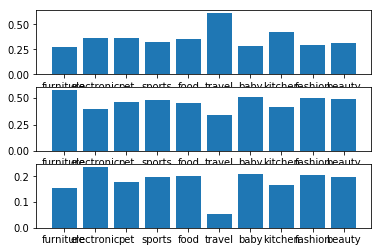

In [22]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum_of_sum)

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum_of_sum)

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 3)
plt.bar(labels, sum2/sum_of_sum)

In [23]:
clutering = pd.concat([sum0,sum1,sum2],axis=1)
#clutering = clutering.reindex(['오'])
clutering['labels'] = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
clutering

,0,1,2,labels
CLAC0_0,662,1404,381,furniture
CLAC0_1,683,738,439,electronic
CLAC0_2,710,909,348,pet
CLAC0_3,4059,5975,2468,sports
CLAC0_4,1663,2129,959,food
CLAC0_5,195,107,17,travel
CLAC0_6,303,551,226,baby
CLAC0_7,1959,1935,773,kitchen
CLAC0_8,6151,10339,4203,fashion
CLAC0_9,1795,2752,1104,beauty


In [24]:
pd.concat([sum0/sum_of_sum,sum1/sum_of_sum,sum2/sum_of_sum],axis=1)

,0,1,2
CLAC0_0,0.270535,0.573764,0.155701
CLAC0_1,0.367204,0.396774,0.236022
CLAC0_2,0.360956,0.462125,0.176919
CLAC0_3,0.324668,0.477924,0.197408
CLAC0_4,0.350032,0.448116,0.201852
CLAC0_5,0.611285,0.335423,0.053292
CLAC0_6,0.280556,0.510185,0.209259
CLAC0_7,0.419756,0.414613,0.165631
CLAC0_8,0.297250,0.499638,0.203112
CLAC0_9,0.317643,0.486993,0.195364


<BarContainer object of 10 artists>

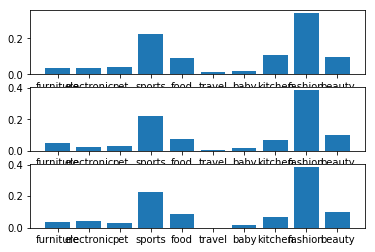

In [25]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum0.sum())

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum1.sum())

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 3)
plt.bar(labels, sum2/sum2.sum())

### predict by clustering score 

In [26]:
def clustering_score(k, new_data, data, transformed_data, category) :
    # k : clustering 개수
    # new_data : new data
    # data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    # transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    # category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([k,10])
    
    for i in range(k) :
        idx = np.where(transformed_data['predict']==i)
        clustering = data.loc[data.index[idx]]
        sum_of_sum = np.log(data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()).sum()
        cate_sum=clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
        cate_sum[cate_sum== 0] = 1
        category_rate[i] = np.log(cate_sum)/sum_of_sum
        
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))

    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]

    return sum(result)

In [29]:
# cluster center와의 거리로
random_idx = cluster_transformed.index[random.randint(0,len(cluster_transformed))]
random_data = cluster_transformed.loc[random_idx, :'weekend_weekend']

score = []
for i in range(10) :
    s = clustering_score(3, random_data, cluster, cluster_transformed, i)*100
    score.append(round(s,2))
actual = list(cluster.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
pd.DataFrame({'category': labels,'score':score,'actual_buy':actual}).sort_values(['score'],ascending=False)

,category,score,actual_buy
8,fashion,21.79,4.0
3,sports,20.58,0.0
9,beauty,18.59,0.0
4,food,18.22,0.0
7,kitchen,18.17,0.0
0,furniture,16.33,0.0
2,pet,16.00,0.0
1,electronic,15.95,0.0
6,baby,14.44,0.0
5,travel,10.98,0.0


### 전체 score -> radar chart

In [98]:
cluster['CLNT_ID'] = list(cluster.index)
cluster_transformed['CLNT_ID'] = list(cluster.index)

In [99]:
cluster_transformed.head()

,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,weekend_weekday,weekend_weekend,predict,CLNT_ID
119,0.131868,0.030303,0.028846,0.020957,0.301408,0.117623,0.006684,0.000770,0.011655,0.0,...,0.0,0.000000,0.100000,0.1,0.800000,0.0,0.500000,0.500000,2,119
155,0.126374,0.020202,0.038462,0.028054,0.133602,0.047924,0.007308,0.000417,0.006993,0.0,...,0.6,0.000000,0.000000,0.0,0.000000,0.2,0.200000,0.800000,0,155
161,0.153846,0.010101,0.074176,0.058514,0.243461,0.103101,0.091449,0.002020,0.001166,0.0,...,0.0,0.000000,0.500000,0.0,0.000000,0.0,0.500000,0.500000,1,161
245,0.120879,0.020202,0.036630,0.039978,0.174380,0.102928,0.037744,0.001255,0.002331,0.0,...,0.0,0.333333,0.333333,0.0,0.000000,0.0,0.333333,0.666667,0,245
276,0.928571,0.010101,0.461538,0.004288,0.128102,0.075199,0.048379,0.001607,0.002331,0.0,...,0.0,0.333333,0.000000,0.0,0.666667,0.0,0.666667,0.333333,2,276


In [ ]:
%%time
cluster['furniture_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: clustering_score(3, x, cluster, cluster_transformed,0))
cluster['travel_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: clustering_score(3, x, cluster, cluster_transformed,5))
cluster['electronic_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: clustering_score(3, x, cluster, cluster_transformed,1))
cluster['pet_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: clustering_score(3, x, cluster, cluster_transformed,2))
cluster['sports_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: clustering_score(3, x, cluster, cluster_transformed,3))
cluster['food_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: clustering_score(3, x, cluster, cluster_transformed,4))
cluster['travel_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: clustering_score(3, x, cluster, cluster_transformed,5))
cluster['baby_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: clustering_score(3, x, cluster, cluster_transformed,6))
cluster['kitchen_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: clustering_score(3, x, cluster, cluster_transformed,7))
cluster['fashion_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: clustering_score(3, x, cluster, cluster_transformed,8))
cluster['beauty_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: clustering_score(3, x, cluster, cluster_transformed,9))

In [31]:
transformed_drop = cluster_transformed.drop(['predict'], axis=1)

In [34]:
score_data = np.empty([transformed_drop.shape[0],10])
for i in tqdm.tqdm(range(len(labels))) :
    for j in range(transformed_drop.shape[0]) : 
        score_data[j,i] = clustering_score(3, transformed_drop.iloc[j], cluster, cluster_transformed, i)*100

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [31:15<00:00, 187.72s/it]


In [36]:
score_data.to_csv('score_M50.csv',index=False)

In [2]:
score_data = pd.read_csv('score_M50.csv')

In [3]:
pd.DataFrame({'min':score_data.min(),'mean':score_data.mean(),'max':score_data.max()})

,min,mean,max
furniture,9.552289,16.017019,30.126498
electronic,9.339155,15.618836,29.623531
pet,9.328829,15.647968,29.748563
sports,12.060960,20.171672,38.088299
food,10.661526,17.843456,33.795428
travel,6.101187,10.490760,21.359671
baby,8.477671,14.183624,26.602307
kitchen,10.572395,17.739854,33.924731
fashion,12.794824,21.382031,40.244157
beauty,10.893417,18.227480,34.401610


In [4]:
score_data = pd.DataFrame(score_data)
score_data.columns = ['furniture_SCORE','travel_SCORE', 'electronic_SCORE', 'pet_SCORE', 'sports_SCORE','food_SCORE', 'baby_SCORE','kitchen_SCORE','fashion_SCORE','beauty_SCORE']
score_data.head()

,furniture_SCORE,travel_SCORE,electronic_SCORE,pet_SCORE,sports_SCORE,food_SCORE,baby_SCORE,kitchen_SCORE,fashion_SCORE,beauty_SCORE
0,14.729871,14.350259,14.359908,18.548883,16.395581,9.437358,13.058039,16.259788,19.677772,16.760597
1,15.566742,15.282654,15.249293,19.709136,17.431323,10.045303,13.822275,17.310096,20.897962,17.793698
2,16.555799,16.244587,16.222715,20.948316,18.531696,10.771422,14.690999,18.418588,22.205922,18.914665
3,16.263275,15.941883,15.893772,20.579232,18.187371,10.275137,14.453054,18.017619,21.837634,18.580153
4,15.312694,14.875944,14.919266,19.236235,17.008410,9.945858,13.553306,16.889450,20.399110,17.388978


In [24]:
CLAC_rate = ttt.div(ttt.sum(axis=1),axis=0)
CLAC_rate.columns = ['C0_Ratio', 'C1_Ratio', 'C2_Ratio', 'C3_Ratio', 'C4_Ratio', 'C5_Ratio', 'C6_Ratio','C7_Ratio', 'C8_Ratio', 'C9_Ratio']
CLAC_rate.index = score_data.index
CLAC_rate.head()

NameError: name 'ttt' is not defined

In [53]:
CLAC_rate.to_csv('ratio_M50.csv',index=False)

In [5]:
CLAC_rate = pd.read_csv('ratio_M50.csv')

In [6]:
CLAC_rate.head()

,C0_Ratio,C1_Ratio,C2_Ratio,C3_Ratio,C4_Ratio,C5_Ratio,C6_Ratio,C7_Ratio,C8_Ratio,C9_Ratio
0,0.0,0.090909,0.000000,0.000000,0.000000,0.0,0.0,0.272727,0.454545,0.181818
1,0.0,0.000000,0.428571,0.000000,0.428571,0.0,0.0,0.000000,0.142857,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.500000,0.500000
3,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.333333,0.666667,0.0,0.0,0.000000,0.000000,0.000000


In [7]:
CLAC_rate.shape

(7741, 10)

In [8]:
score_data.shape

(7741, 10)

In [37]:
result_score = CLAC0_data
result_score.index = score_data.index
result_score.head()

,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,furniture_new
0,0,1,0,0,0,0,0,3,5,2,14.729871
1,0,0,3,0,3,0,0,0,1,0,15.566742
2,0,0,0,0,0,0,0,0,1,1,16.555799
3,0,0,0,3,0,0,0,0,0,0,16.263275
4,0,0,0,1,2,0,0,0,0,0,15.312694


In [10]:
result_score =  pd.DataFrame({'index':list(range(7741))})
result_score.head()

,index
0,0
1,1
2,2
3,3
4,4


In [11]:
import tqdm
result_score['furniture_new'] = score_data['furniture_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C0_Ratio'][i] > 0 :
        result_score['furniture_new'][i] = result_score['furniture_new'][i]*(1 + CLAC_rate['C0_Ratio'][i])

  0%|                                                                                         | 0/7741 [00:00<?, ?it/s]C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
100%|█████████████████████████████████████████████████████████████████████████████| 7741/7741 [00:21<00:00, 356.65it/s]


In [21]:
pd.DataFrame({'new':result_score['fashion_new'],'orginal':score_data['fashion_SCORE'],'ratio':CLAC_rate['C8_Ratio']}).head(10)

,new,orginal,ratio
0,28.622213,19.677772,0.454545
1,23.883385,20.897962,0.142857
2,33.308884,22.205922,0.500000
3,21.837634,21.837634,0.000000
4,20.399110,20.399110,0.000000
5,34.211231,17.105615,1.000000
6,17.319336,17.319336,0.000000
7,46.638069,23.319035,1.000000
8,29.516021,19.677347,0.500000
9,26.205392,18.718137,0.400000


In [39]:
result_score[['furniture_new','CLAC0_0']].sort_values(['furniture_new'],ascending=False).head()

,furniture_new,CLAC0_0
132,44.430740,5
6474,42.621249,202
4545,39.095286,3
4812,38.827235,72
3338,38.305710,4


In [16]:
result_score['travel_new'] = score_data['travel_SCORE']
for i in range(len(score_data)) :
    if CLAC_rate['C1_Ratio'][i] != 0 :
        result_score['travel_new'][i]=result_score['travel_new'][i]*(1+CLAC_rate['C1_Ratio'][i])

result_score['electronic_new'] = score_data['electronic_SCORE']
for i in range(len(score_data)) :
    if CLAC_rate['C2_Ratio'][i] != 0 :
        result_score['electronic_new'][i]=score_data['electronic_SCORE'][i]*(1+CLAC_rate['C2_Ratio'][i])

result_score['pet_new'] = score_data['pet_SCORE']
for i in range(len(score_data)) :
    if CLAC_rate['C3_Ratio'][i] != 0 :
        result_score['pet_new'][i]=score_data['pet_SCORE'][i]*(1+CLAC_rate['C3_Ratio'][i])

result_score['sports_new'] = score_data['sports_SCORE']
for i in range(len(score_data)) :
    if CLAC_rate['C4_Ratio'][i] != 0 :
        result_score['sports_new'][i]=score_data['sports_SCORE'][i]*(1+CLAC_rate['C4_Ratio'][i])        

C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [18]:
result_score['food_new'] = score_data['food_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C5_Ratio'][i] != 0 :
        result_score['food_new'][i]=score_data['food_SCORE'][i]*(1+CLAC_rate['C5_Ratio'][i])  
        
result_score['baby_new'] = score_data['baby_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C6_Ratio'][i] != 0 :
        result_score['baby_new'][i]=score_data['baby_SCORE'][i]*(1+CLAC_rate['C6_Ratio'][i])  
        
result_score['kitchen_new'] = score_data['kitchen_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C7_Ratio'][i] != 0 :
        result_score['kitchen_new'][i]=score_data['kitchen_SCORE'][i]*(1+CLAC_rate['C7_Ratio'][i])  
        
result_score['fashion_new'] = score_data['fashion_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C8_Ratio'][i] != 0 :
        result_score['fashion_new'][i]=score_data['fashion_SCORE'][i]*(1+CLAC_rate['C8_Ratio'][i])  
        
result_score['beauty_new'] = score_data['beauty_SCORE']
for i in tqdm.tqdm(range(len(score_data))) :
    if CLAC_rate['C9_Ratio'][i] != 0 :
        result_score['beauty_new'][i]=score_data['beauty_SCORE'][i]*(1+CLAC_rate['C9_Ratio'][i])  

  0%|                                                                                         | 0/7741 [00:00<?, ?it/s]C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  0%|                                                                                         | 0/7741 [00:00<?, ?it/s]C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  0%|                                                                                         | 0/7741 [00:00<?, ?it/s]C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:14: SettingWit

In [19]:
result_score.isna().sum()

index             0
furniture_new     0
travel_new        0
electronic_new    0
pet_new           0
sports_new        0
food_new          0
baby_new          0
kitchen_new       0
fashion_new       0
beauty_new        0
dtype: int64

In [20]:
result_score.drop(['index'],axis=1).head()

,furniture_new,travel_new,electronic_new,pet_new,sports_new,food_new,baby_new,kitchen_new,fashion_new,beauty_new
0,14.729871,15.654828,14.359908,18.548883,16.395581,9.437358,13.058039,20.694275,28.622213,19.807978
1,15.566742,15.282654,21.784704,19.709136,24.901891,10.045303,13.822275,17.310096,23.883385,17.793698
2,16.555799,16.244587,16.222715,20.948316,18.531696,10.771422,14.690999,18.418588,33.308884,28.371998
3,16.263275,15.941883,15.893772,41.158465,18.187371,10.275137,14.453054,18.017619,21.837634,18.580153
4,15.312694,14.875944,14.919266,25.648313,28.347350,9.945858,13.553306,16.889450,20.399110,17.388978


In [22]:
result_score.to_csv('final_score_M50.csv',index=False)

In [3]:
result_score = pd.read_csv('final_score_M50.csv')
result_score.head()

FileNotFoundError: File b'final_score_M50.csv' does not exist

## 시각화

In [83]:
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))

mean_stats = result_score.mean().values
mean_stats = np.concatenate((mean_stats,[mean_stats[0]]))

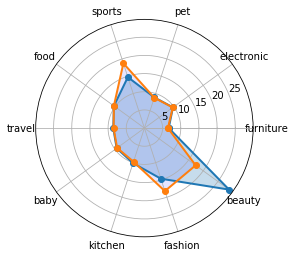

In [84]:
stats = result_score.iloc[10].values
stats = np.concatenate((stats,[stats[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.plot(angles, mean_stats, 'o-', linewidth=2)
ax.fill(angles, mean_stats,"b",alpha=0.1)

ax.grid(True)

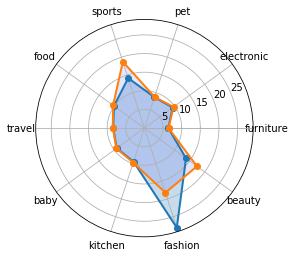

In [85]:
stats = result_score.iloc[30].values
stats = np.concatenate((stats,[stats[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.plot(angles, mean_stats, 'o-', linewidth=2)
ax.fill(angles, mean_stats,"b",alpha=0.1)

ax.grid(True)